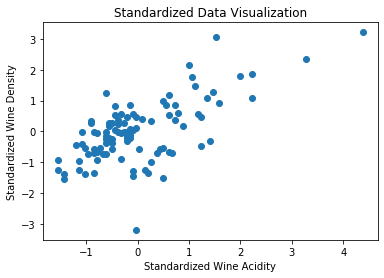

In [44]:
'''
************************************************
** COL774 Machine Learning
** Assignment 1: Least Squares Linear Regression
** Question 1
** @Author: Aman Bhardwaj
** @Entry No. 2019SIY7580
** @Date: 23 Jan 2020
************************************************
'''

import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
from sklearn import preprocessing as pp

# Import Data from CSV
# Create panda dataframes and store them as X and Y
# X = Parameters 
# Y = Labels
xData = pa.read_csv('linearX.csv', names=['Wine Acidity'])
yData = pa.read_csv('linearY.csv', names=['Wine Density'])

# Standardize the data for proper learning of model
#ppObj = pp.StandardScaler()

#Standardize Wine Acidity parameter and store in scaled_X variable
scaled_X = ppObj.fit_transform(xData)
scaled_X = pa.DataFrame(scaled_X)

#Standardize Wine Density Label and store in scaled_Y variable
scaled_Y = ppObj.fit_transform(yData)
scaled_Y = pa.DataFrame(scaled_Y)
#scaled_Y = yData
#Data Visualization of standardized data
#Plot X vs Y
#To check if linear model can be a good learning model for this data
plt.subplot(1,1,1)
plt.plot(scaled_X, scaled_Y, 'o')
plt.xlabel("Standardized Wine Acidity")
plt.ylabel("Standardized Wine Density")
plt.title("Standardized Data Visualization")
plt.show()

In [38]:
#Define Global Variables for Batch Gradient Descent
m = len(xData) #Number of samples
X = np.c_[np.ones(m),scaled_X] #Introduce intercept term with X0 whose all values = 1
Y = scaled_Y
learn = 0.001 #Learning Rate
theta = np.zeros((2,1)) #as per instructions taking Theta0 = vector of 0s
X_T = X.T #X Transpose



#---------*Q1(a) Results*-----------#
----------Results---------
Number of Iterations: 52
Learning Rate: 0.001
Final Parameters i.e. Theta values
Theta[0] [-5.91423646e-14]
Theta[1] [0.65260328]
Stopping Criteria: Difference in J(i) - J(i-1)<= Epsilon(ep). ep = ) 1e-06
----------------------------------


#---------*Q1(b) Plots*-----------#
----------Plots---------


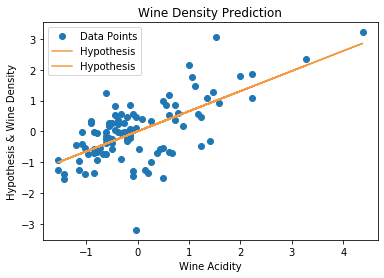

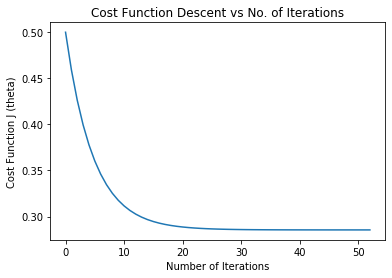

In [55]:
#===Q1(a)===Gradient Descent======#

#function to calculate hypothesis in each iteration
def hypothesis(x, t):
    return np.dot(x, t)

#function to calculate Cost Function J(theta) in each iteration
def errorFunction(d):
    sumOfLeastSquares = np.sum(d**2)
    costFun = sumOfLeastSquares/(2*m)
    return costFun

#Q1.(a) Gradient Descent Implementation
def gradientDescent(x, y, t, lr, ep, iterations):
    J = []
    jOld = float(0)
    for i in range(iterations):
        h = hypothesis(x, t)  #calculate hypothesis      
        error = y - h  
        j = errorFunction(error) #Cost Function Value
        J.append(j)   #Create list of J Values for final plot
        
        #Calculate Gradient and Update Theta
        gradient = np.dot(X_T, error)
        t = t + lr*gradient
        
        #Stopping Criteria
        jDiff = jOld - j
        comp = abs(jDiff) <= ep
        if comp.bool():
            break
        jOld = j
    return i, t, lr, ep, J
    
def printResults(i, t, lr, ep):    
    print("----------Results---------")
    print("Number of Iterations:", i)    
    print("Learning Rate:", lr)
    print("Final Parameters i.e. Theta values")
    print("Theta[0]",t[0])
    print("Theta[1]",t[1]) 
    print("Stopping Criteria: Difference in J(i) - J(i-1)<= Epsilon(ep). ep = )",ep)
    print("----------------------------------")
    #print("Hypothesis:",hypo)

    
#Q1.(b) #Plot Hypothesis and DataPoints
def plotGraph(t, x, y, J):    
    #-------Q1 (b).-----------#    
    print("----------Plots---------")    
    hypo = t[0] + t[1]*x
    plt.subplot(1,1,1)
    plt.plot(x[:,1],y, 'o',label="Data Points")
    plt.plot(x,hypo,'#f59942', label="Hypothesis")
    plt.ylabel("Hypothesis & Wine Density")
    plt.xlabel("Wine Acidity")
    plt.title("Wine Density Prediction")
    plt.legend()
    plt.show()
    plt.plot(J)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost Function J (theta)")
    plt.title("Cost Function Descent vs No. of Iterations")
    plt.show()
        
ITR, THETA, LR, EP, J = gradientDescent(X, Y, theta, learn, 0.000001, 100)
print("\n\n#---------*Q1(a) Results*-----------#")
printResults(ITR, THETA, LR, EP)
print("\n\n#---------*Q1(b) Plots*-----------#")
plotGraph(THETA, X, Y, J)

In [ ]:
fig = plt.figure(1)
ax = plt.subplot(1, 1, 1, projection='3d')


C:\Users\Aman\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)




#---------*Q1(a) Results*-----------#
----------Results---------
Number of Iterations: 99
Learning Rate: 1.3
Final Parameters i.e. Theta values
Theta[0] [4.07953759e+197]
Theta[1] [-7.50334724e+210]
Stopping Criteria: Difference in J(i) - J(i-1)<= Epsilon(ep). ep = ) 1e-06
----------------------------------


#---------*Q1(b) Plots*-----------#
----------Plots---------


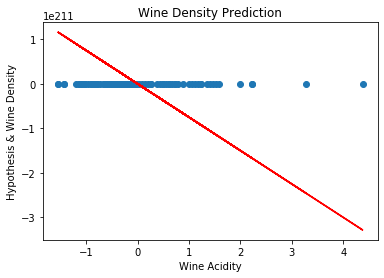

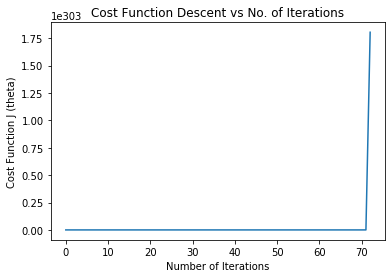

In [108]:
ITR, THETA, LR, EP, J = gradientDescent(X, Y, theta, 1.3, 0.000001, 100)
print("\n\n#---------*Q1(a) Results*-----------#")
printResults(ITR, THETA, LR, EP)
print("\n\n#---------*Q1(b) Plots*-----------#")
plotGraph(THETA, X, Y, J)

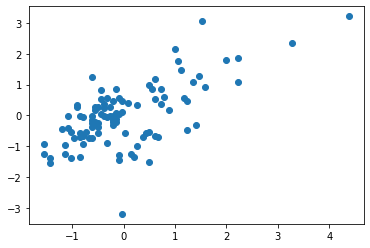